In [1]:
from astropy.io import fits, ascii
from astropy.table import Table, Column, hstack
from photutils import CircularAnnulus
import pdb
import numpy as np
import rafias_lib as rl
import glob
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)

In [2]:
files_sub = np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'
                              '/NRCN821WLP8SUB-60*_1_481_SE_*/*.slp.fits'))
len(files_sub)

306

In [3]:
centers_sub = rl.gen_center_g2d(166,160,5,400,2,2,0,files_sub)

In [4]:
files_sub640 = np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'
                              '/NRCN821WLP8SUB640-60*_1_481_SE_*/*.slp.fits'))
len(files_sub640)

60

In [5]:
centers_sub640 = rl.gen_center_g2d(326,320,5,400,2,2,0,files_sub640)

In [19]:
files_full1 = np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM/'
                              'NRCN821WLP8FULL1-*_1_481_SE_*/*.red.fits'))
len(files_full1)

225

In [20]:
centers_full1 = rl.gen_center_g2d(1405,1036,5,400,4,4,0, files_full1, red = True)

In [21]:
files_clr = np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'
                              '/NRCN821CLRSUB1*_481_SE_2016-*/*.slp.fits'))

In [22]:
centers_clr = rl.gen_center_g2d(164,161,5,3500,2,2,0,files_clr)

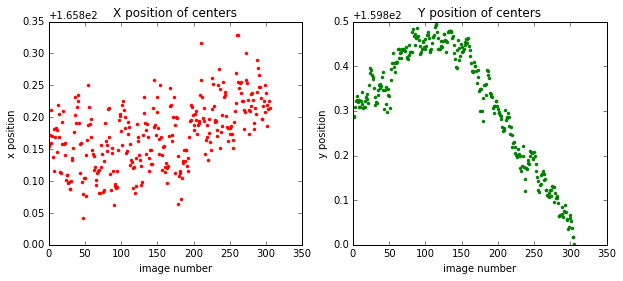

In [9]:
plt.figure(figsize=(10, 4))
for i in range(len(files_sub)):
    plt.subplot(1,2,1)
    plt.plot(i, centers_sub[1][i], 'r.')
    plt.title('X position of centers')
    plt.ylabel('x position')
    plt.xlabel('image number')
    plt.subplot(1,2,2)
    plt.plot(i, centers_sub[2][i], 'g.')
    plt.title('Y position of centers')
    plt.ylabel('y position')
    plt.xlabel('image number')

In [28]:
im_sub, _, _, mask_sub = rl.test_image(files_sub[0], Time =False)
im_sub640, _, _, mask_sub640 = rl.test_image(files_sub640[0], Time =False)
im_full1, _, _, mask_full1 = rl.test_image(files_full1[0], Time =False)
im_clr, _, _, mask_clr = rl.test_image(files_clr[0], Time =False)
ap40 = rl.photometry(im_full1, centers_full1[1][0], centers_full1[2][0], mask_full1, rad = 40)[1]
ap50 = rl.photometry(im_full1, centers_full1[1][0], centers_full1[2][0], mask_full1, rad = 50)[1]
ap60 = rl.photometry(im_full1, centers_full1[1][0], centers_full1[2][0], mask_full1, rad = 60)[1]
ap70 = rl.photometry(im_full1, centers_full1[1][0], centers_full1[2][0], mask_full1, rad = 70)[1]

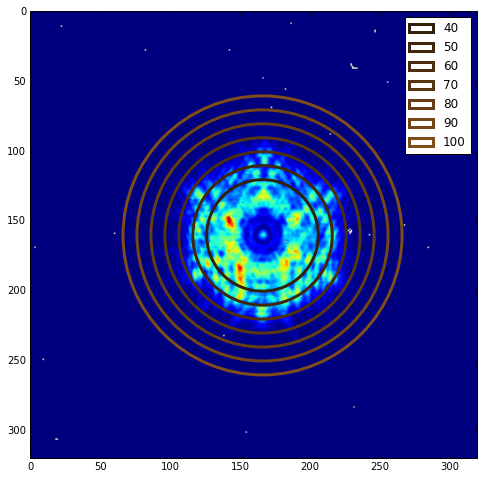

In [47]:
plt.imshow(img)
for i in range(40, 102, 10):
    globals()['ap%i' % i] = rl.photometry(img, centers_sub[1][0][0], centers_sub[2][0][0], mask, rad = i)[1]
    globals()['ap%i' % i].plot(color= (0.005*i, 0.003*i, 0.001*i), linewidth=3, label = '%i' % i)
plt.legend(loc = 'best')

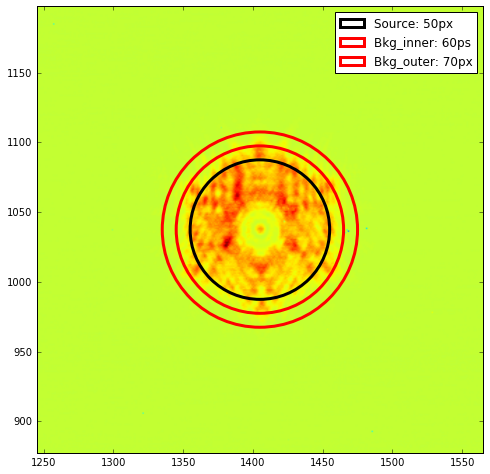

In [30]:
plt.imshow(im_full1)
plt.xlim(centers_full1[1][0][0]-160, centers_full1[1][0][0]+160)
plt.ylim(centers_full1[2][0][0]-160, centers_full1[2][0][0]+160)
# ap40.plot(color='k',linewidth=3, label = 'Source: 40px')
ap50.plot(color='k',linewidth=3, label = 'Source: 50px')
ap60.plot(color='r',linewidth=3, label = 'Bkg_inner: 60ps')
ap70.plot(color='r',linewidth=3, label = 'Bkg_outer: 70px')
plt.legend(loc = 'best')